<a href="https://colab.research.google.com/github/MalikHasnat1999/ZTM_Tensorflow/blob/master/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification 

> A Classification is where you try to classify something as one thing or another

A Few type of Classification problem
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Creating Data to view and fit

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles

# Make 1000 Examples
# n_samples = 1000

# Create Circles
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)


In [ ]:
# check the features
x[0]

array([0.75424625, 0.23148074])

In [ ]:
# check the labels
y[0]

1

In [ ]:
# Labeling the data
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "y":y})
circles

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


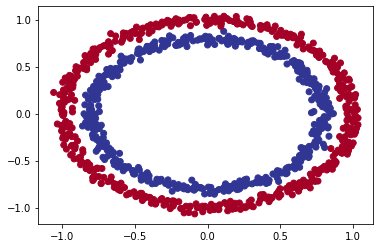

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1],c=y, cmap=plt.cm.RdYlBu)

# Build the model

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model
history_1 = model_1.fit(x, y, epochs=100, verbose=0)

# Evaluate the model
model_1.evaluate(x, y)

32/32 [==============================] - 0s 989us/step - loss: 0.6944 - accuracy: 0.5100


[0.6944003105163574, 0.5099999904632568]

> At the accuracy of 51% our model is just guessing the labels it doesn't actually understands the relationship between the features

# Improving our model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics = ["accuracy"]
)
# fit the model
history_2 = model_2.fit(x, y, epochs=100, verbose=0)

# evaluate the model
model_2.evaluate(x, y)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000


[0.6944548487663269, 0.5]

Still our model doesn't show any progress

Text(0, 0.5, 'Loss')

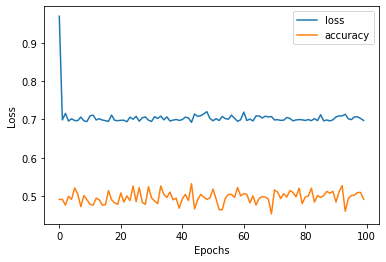

In [ ]:
# plottin the Loss curve or Training Curve
pd.DataFrame(history_2.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

To visualize our model prediction lets create a function `plot_prediction_boundry()` this function will:

* Take in a trained model,  features (X) and label (Y)
* Create a meshgrid of the different X values [np.meshgrid()](https://www.youtube.com/watch?v=qQeKEawn_HI)
* Make prediction across the meshgird
* Plot the prediction as well as the line between zones(where each unique class falls)

In [ ]:
circles.head()

NameError: ignored

## plot_prediction_boundry()

In [ ]:
import numpy as np

def plot_prediction_boundry(model, x, y):
  """
  Plot the decision boundry created by a model prediction on x.
  """
  # Define the axis boundry created by a model prediction on X
  x0_min, x0_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1               # max and min of x0
  x1_min, x1_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1               # max and min of x1

  x0x0, x1x1 = np.meshgrid(np.linspace(x0_min, x0_max, 100),            # linespace() Return evenly spaced
                           np.linspace(x1_min, x1_max, 100))            # numbers over a specified interval.
 
 
  # Created x Values (we are going to make prediction on these)
  x_in = np.c_[x0x0.ravel(), x1x1.ravel()]                              # .ravel() Returns a flattened array. (meaning seprate or untangle)
                                                                        # np.c_[] make a single -> 2D <- array of (x, y) 

  # make prediction 
  y_probability = model.predict(x_in)


  # check for multiclass
  if len(y_probability[0]) > 1:                                                # if y_pred returns more than 1 value
    print("doing multiclass classification")
    # In this case we have to reshape our predictionto get them ready for plotting
    y_pred = np.argmax(y_probability, axis=1).reshape(x0x0.shape)
  else:
    print("doing Binary classification")
    y_pred = np.round(y_probability) 
    y_pred = y_pred.reshape(x0x0.shape)                                 # reshaping to plot contourf()

  
  # plot the decision boundry
  #          (100,100)  (100,100)  (100,100)
  plt.contourf(x0x0,     x1x1,      y_pred,    cmap=plt.cm.RdYlBu, alpha=0.7) # contour meaning outilne or shape
  plt.scatter(x[:, 0], x[:,1], c=y, s=20, cmap=plt.cm.RdYlBu)
  plt.xlim(x0x0.min(), x0x0.max())
  plt.ylim(x1x1.min(), x1x1.max())

doing Binary classification


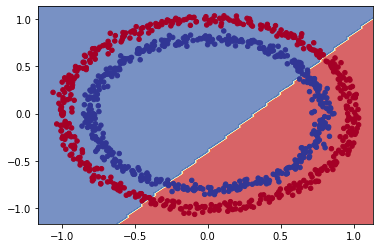

In [ ]:
plot_prediction_boundry(model=model_1, x=x, y=y)

In [ ]:
# # ruff

# x_min, x_max = x[:,0].min()-0.1, x[:,0].max()+0.1
# y_min, y_max = x[:,1].min(), x[:,1].max()
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))

# xx.ravel(), yy.ravel()
# x_in = np.c_[xx.ravel(), yy.ravel()]
# xx.ravel(), yy.ravel(), x_in

# # 100 equally spaced no                   meshgrid            prediction values
# np.linspace(x_min, x_max, 100).shape,     xx.shape,           x_in.shape

((100,), (100, 100), (10000, 2))

# 77.Non-linearity

In [ ]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=1200, noise=0.03, random_state=42)
x

array([[ 0.77436678, -0.16684775],
       [-0.72186762,  0.24689819],
       [ 0.48004702,  0.86912612],
       ...,
       [ 0.58774616, -0.53787273],
       [-0.68560736,  0.30462475],
       [ 0.6108185 , -0.59509517]])

In [ ]:
# set the random seed
tf.random.set_seed(42)

# crated the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)

# fit the model
history_2 = model_3.fit(x,y, epochs=100, verbose=0)

# Evlauate the model
model_3.evaluate(x,y)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


38/38 [==============================] - 0s 980us/step - loss: 0.6932 - accuracy: 0.4817


[0.6932077407836914, 0.4816666543483734]

doing Binary classification


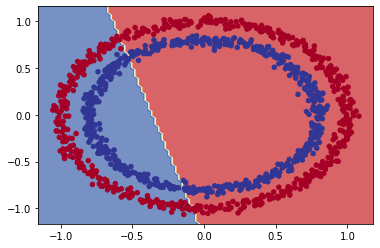

In [ ]:
plot_prediction_boundry(model_3, x, y)

Building model with non-linear Activation

In [ ]:
# set seed
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu"),
  
])

# compile the model
model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

# fit the model
history_6 = model_6.fit(x, y, epochs=100, verbose=0)

# Evaluate the model
model_6.evaluate(x, y)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


38/38 [==============================] - 0s 999us/step - loss: 0.5856 - accuracy: 0.8058


[0.5855863094329834, 0.8058333396911621]

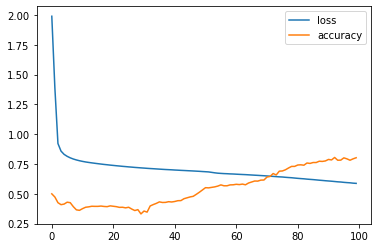

In [ ]:
pd.DataFrame(history_6.history).plot()

doing Binary classification


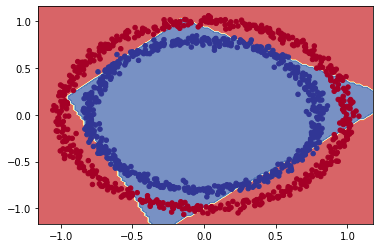

In [ ]:
plot_prediction_boundry(model_6, x, y)

Our model is showing improvement..

Let's improve it more for once and for all

In [ ]:
# set seed
tf.random.set_seed(42)

# create the model
model_7 = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation="relu"),     # x0
      tf.keras.layers.Dense(4, activation="relu"),     # x1
      tf.keras.layers.Dense(1, activation="sigmoid")   # y
])

# compile the model
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)
# fit the model
history_7 = model_7.fit(x, y, epochs=200, verbose=0)

# evaluate the model
model_7.evaluate(x, y)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


38/38 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9958


[0.040733423084020615, 0.9958333373069763]

doing Binary classification


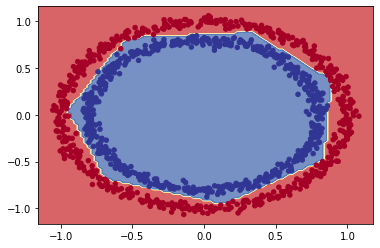

In [ ]:
plot_prediction_boundry(model_7, x, y)

Text(0, 0.5, 'Loss')

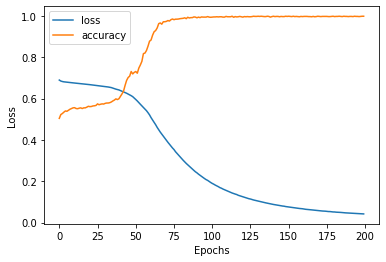

In [ ]:
pd.DataFrame(history_7.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

> The combination of **linear (straight lines)** and **non-linear (non-straight lines)** function is one of the key fundamental of neural network

## Recreating our Activation Functions

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>, [<matplotlib.lines.Line2D at 0x7fbab9c9f910>])

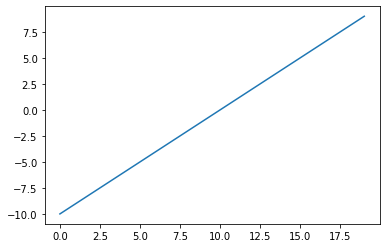

In [ ]:
# Getting our data ready
A = tf.range(-10, 10, dtype="float32")
A, plt.plot(A)

### "ReLU"

In [ ]:
# Checking our "ReLU" activation function
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

**ReLU** converts all of our negative numbers into *0*

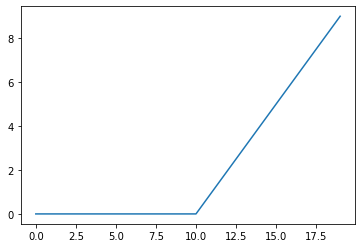

In [ ]:
# plotting our sigmoid function
plt.plot(tf.keras.activations.relu(A))

### "Sigmoid"

In [ ]:
# Checking our "Sigmoid" activation function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [ ]:
# OR 
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5399931e-05, 1.2338161e-04, 3.3542514e-04, 9.1105700e-04,
       2.4726391e-03, 6.6929162e-03, 1.7986238e-02, 4.7425866e-02,
       1.1920291e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966455e-01, 9.9987662e-01],
      dtype=float32)>

Returns the values between '0' and '1'>>>
"Probability matrix"

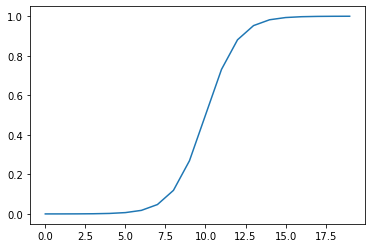

In [ ]:
# plotting our sigmoid activation function
plt.plot(tf.keras.activations.sigmoid(A))

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>, [<matplotlib.lines.Line2D at 0x7fbab1f0fa50>])

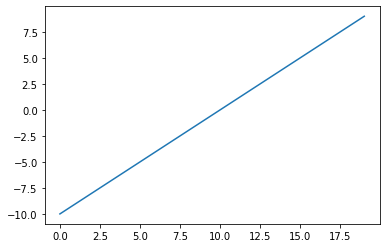

In [ ]:
# Checking our linear activation function
tf.keras.activations.linear(A), plt.plot(tf.keras.activations.linear(A))

**Linear** activation doesn't actually change anything in the model

In [ ]:
# Creating Test and Train Data
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

In [ ]:
# set random seed
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)

# fit the model
history_8 = model_8.fit(x_train, y_train, epochs=100, verbose=0)

# evaluate the model
model_8.evaluate(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


8/8 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000


[0.004145496990531683, 1.0]

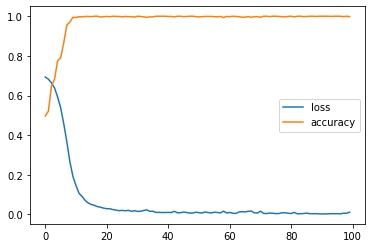

In [ ]:
# Loss Curve
pd.DataFrame(history_8.history).plot()

doing Binary classification
doing Binary classification


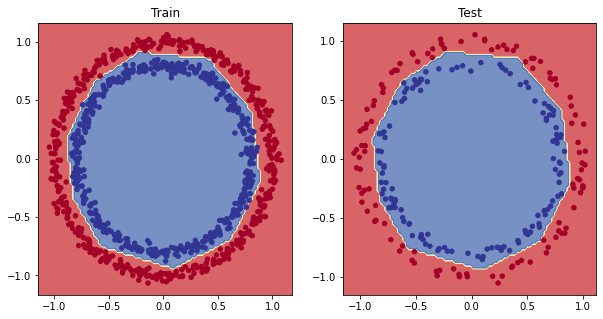

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_prediction_boundry(model_8, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_prediction_boundry(model_8, x_test, y_test)

# 84.Using **callback** to find Ideal "Learning_Rate"
In order to find the learning rate we are going to use the following steps:
* Learning_rate callback - you can think of **callback** as an extra piece of functionality that you can add to your model while it trains
* Another model
* A modified loss curve plot

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# create learning rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

# fit the model
history_9 = model_9.fit(x_train,
                        y_train,
                        epochs=100,
                        verbose=0,
                        callbacks=[lr_scheduler])

# Evaluate the model
model_9.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1.2879 - accuracy: 0.4750


[1.2879376411437988, 0.4749999940395355]

Text(0.5, 1.0, 'Loss Curve')

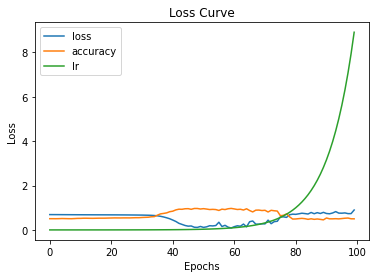

In [ ]:
# plot the Loss Curve
pd.DataFrame(history_9.history).plot(xlabel="Epochs", ylabel="Loss")
plt.title("Loss Curve")

In [ ]:
pd.DataFrame(history_9.history).head(3)

,loss,accuracy,lr
0,0.691247,0.506250,0.000100
1,0.690472,0.506250,0.000112
2,0.689859,0.505208,0.000126


Text(0.5, 0, 'Learning rate')

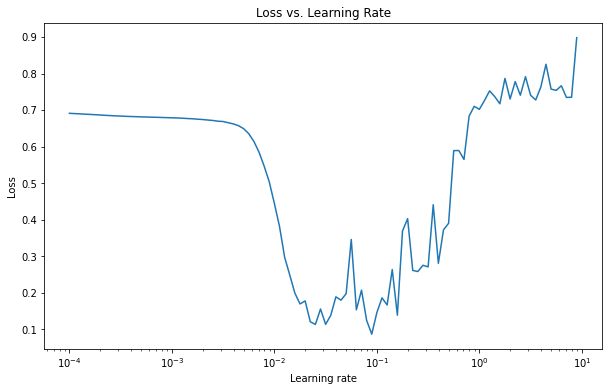

In [ ]:
# plotting the result
plt.figure(figsize=(10,6))
plt.semilogx(history_9.history["lr"], history_9.history["loss"])
plt.title("Loss vs. Learning Rate")
plt.ylabel("Loss")
plt.xlabel("Learning rate")

Building models with increased "Learning rate" till we have the learnig rate with maximum Accuracy.

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.06),
    metrics = ["accuracy"]
)

# fit the model
history_10 = model_10.fit(x_train, y_train, epochs=100, verbose=0,)

# Evaluate the model
model_10.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9833


[0.0417732410132885, 0.9833333492279053]

Clearly astounding results, Accuracy jumped from **50% to 98.3%** when "learning rate" is increased from **0.01 to 0.06**

**Building another model** **bold text**

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_11.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics = ["accuracy"]
)

# fit the model
history_11 = model_11.fit(x_train, y_train, epochs=100, verbose=0,)

# Evaluate the model
model_11.evaluate(x_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9958


[0.013010057620704174, 0.9958333373069763]

By choosing the "Learning Rate" value from the "*Loss vs. Learning Rate*" graph **0.02** or **2*10^-2**  as being the lowest in graph before the graph starts rising again.

The Accuracy has increased from **98%** (lr=0.1) to **99.5%** (lr=0.02)

Increasing the learning rate more doesn't improve the accuracy at all.

**RESULT**
> So, for the above Data of make_circles() x and y the **Ideal** Learning Rate is **0.02**

doing Binary classification
doing Binary classification


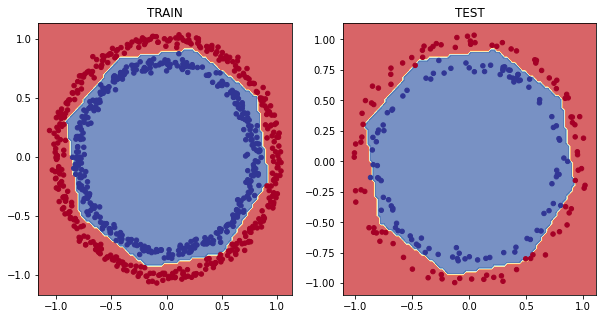

In [ ]:
# plotting our final model
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("TRAIN")
plot_prediction_boundry(model_11, x_train, y_train)
plt.subplot(1,2,2)
plt.title("TEST")
plot_prediction_boundry(model_11, x_test, y_test)

## Classification Evaluation methods:
Alongside viualizing our models results as much as possible there are handful of other classification evaluation method and metrics that you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification Report

In [ ]:
# Accuracy
loss, accuracy = model_11.evaluate(x_test, y_test)
accuracy * 100

8/8 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9958


99.58333373069763

**Confusion Matrix**
* True Positive - model predicts 1 when truth is 1
* True Negative - model predicts 0 when truth is 0
* False Positive - model predicts 1 when truth is 0
* False Negative - model predicts 0 when truth is 1

In [ ]:
from sklearn.metrics import confusion_matrix

# predict the test values
y_probability = model_11.predict(x_test)

# # create confusion matrix
# confusion_matrix(y_test, y_pred)


# Gives Error

In [ ]:
# y_pred are the probabilites of the expected results
y_probability[0]

array([0.99999446], dtype=float32)

In [ ]:
y_test[:5]

array([1, 1, 0, 0, 1])

Oops... seems like our prediction array has come out in **prediction probability** form... the *standard output from the sigmoid (or softmax) activation function*

In [ ]:
# we have round off the values and rehape the array into y_test.shape
y_pred = y_probability.round().reshape(y_test.shape)
y_pred[:5]

array([1., 1., 0., 0., 1.], dtype=float32)

In [ ]:
# find the confusion matrix
confusion_matrix(y_test, y_pred)

array([[114,   0],
       [  1, 125]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,114,0
1,1,125


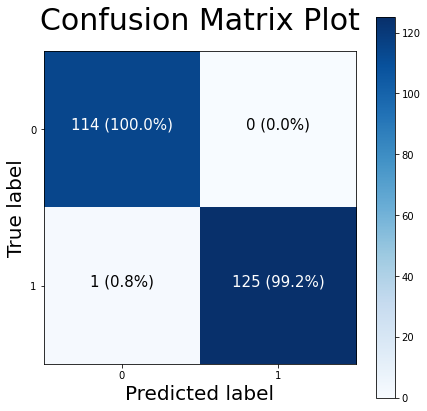

In [ ]:
# Note: the confusion matrix code we are about to write is a remix of scikit's learn plot_confusion_matrix

import itertools

# create the confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
# normalize our confusoin matrix
c_matrix_norm = c_matrix.astype("float") / c_matrix.sum(axis=1)[:,np.newaxis]             
                                          # Convert cm into float type and divides with ->takes sum by rows{[100,
                                          # then chages the shape to   {[100], shape=(2,1)                   100]}
                                          #                             [100]}                            shape=(2,) 
                                          # np.newaxis is used to increase the dimension 1D -> 2D, 2D -> 3D    

no_of_classes = c_matrix.shape[0]

#let's prettify it
fig, ax = plt.subplots(figsize=(7,7)) #using the variable ax for single a Axes
#create matrix plot
cax = ax.matshow(c_matrix, cmap=plt.cm.Blues) #Plot the values of a 2D matrix or array as color-coded image.
fig.colorbar(cax)

# setting the labels in x and y (0,1...)
labels= np.arange(c_matrix.shape[0])

#label the axis
ax.set(title="Confusion Matrix Plot",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(no_of_classes),
       yticks=np.arange(no_of_classes),
       xticklabels=labels,
       yticklabels=labels)

# adjust the label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(30)

# set xlabel to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# set threshold value for different colors
threshold = (c_matrix.max() + c_matrix.min()) / 2


# plot the text on each cell
for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        plt.text(j, i, f"{c_matrix[i,j]} ({c_matrix_norm[i,j]*100:.1f}%)",       
          horizontalalignment="center",                
          color="white" if c_matrix[i,j] > threshold else "black",                
          size=15)   
          
          # .product() Cartesian product of input iterables.
          # .product() is Equivalent to nested for-loops.
          # (range(0, 2), range(0, 2))
          # .text() Add the text to the axes at location *i*, *j* in data coordinates                                                            #
  


In [ ]:
# # Ruff
# c_matrix_norm = c_matrix.astype("float") / c_matrix.sum(axis=1)[:,np.newaxis]
# c_matrix_norm

# no_of_classes = c_matrix.shape
# no_of_classes

# c_matrix.shape[1]

# range(c_matrix.shape[1]), range(c_matrix.shape[0])

# for i in itertools.product(range(2), range(2)):
#   print(i)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[114,   0],
       [  1, 125]])

## plot_confusion_matrix()

In [ ]:
# Making our own Confusionn_matrix plotter function
def plot_confusion_matrix(y_test, y_pred):

  """
  Plots the confusion matrix
  """

  import itertools

  # create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # normalize the confusion matrix
  cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  classes = cm.shape[0]

  # Lets create a pretty graph
  fg, ax = plt.subplots(figsize=(10,10))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fg.colorbar(cax)

  # Labeling our graph
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="Truth Label",
         xticks=np.arange(classes),
         yticks=np.arange(classes),
         xticklabels=np.arange(classes),
         yticklabels=np.arange(classes))

  # set xticks and xtickslabels to bottom
  ax.xaxis.tick_bottom()
  ax.xaxis.set_label_position("bottom")

  # set the labels size
  ax.xaxis.label.set_size(18)
  ax.yaxis.label.set_size(18)
  ax.title.set_size(20)

  # printing values on the grah
  # setting the threshold value for different colors
  threshold = (cm.max() + cm.min()) / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]}({cm_normal[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)
  

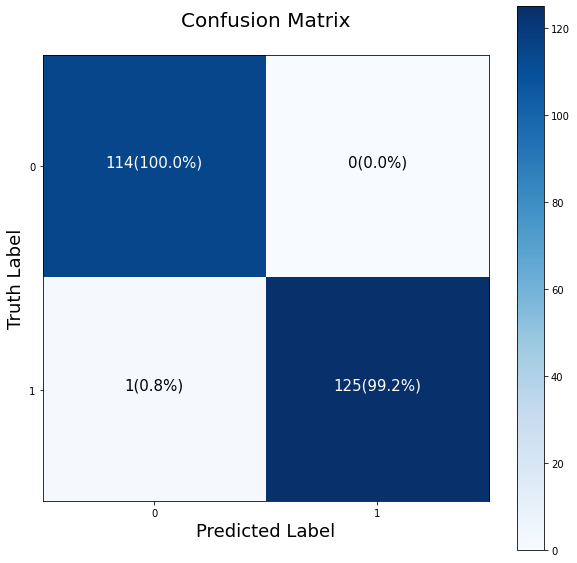

In [ ]:
plot_confusion_matrix(y_test, y_pred)

# 90.Multi-class Classification
> When you have more than two classes as an option, it is known as multi-class classification

* This means that if you have 3 different classes or more then it is called multi-class classification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# check data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [ ]:
# shape of a single dataset
x_train[0].shape, y_train[0].shape

((28, 28), ())

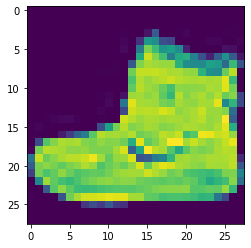

In [ ]:
# plot a single data set
plt.imshow(x_train[0])

In [ ]:
# label
y_train[0]

9

In [ ]:
# giving description to our labels
label_name = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

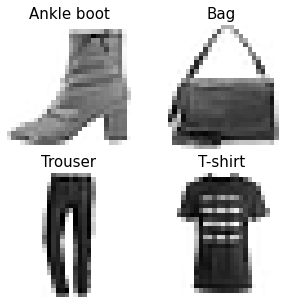

In [ ]:
# Random Image plotter
import random
plt.figure(figsize=(5,5))
for i in range(4):
  plt.subplot(2, 2, i+1)
  index = random.choice(range(len(x_train)))
  plt.imshow(x_train[index], cmap=plt.cm.binary)
  plt.title(label_name[y_train[index]], size=15)
  plt.axis(False)

## i).Building Multi-class classification Model
for our multi-class classification, we can use a similar architecture to our binary classifiers, however we are going to have to tweak a few things:
* input shape = 28x28 (image shape in pixel)
* output shape = 10 (one for each label)
* output layer activation = softmax (not sigmoid)
* Loss function = tf.keras.lossses.CategoricalCrossentropy
  * if your labels are one_hot encoded use CategoricalCrossentropy()
  * if your labels are not one_hot encoded use SparseCategoricalCrossentropy()

You will also need to fatten your input shape. Our model needs to be flatted from (28*28 to none, 784)

In [ ]:
# simple faltten model
flatten_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

### SparseCategoricalCrossentropy()

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")                          
    
])

# compile the model
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model
history_12 = model_12.fit(x_train, y_train,
                          epochs=10, verbose=0,
                          validation_data=(x_test, y_test))

# evaluate the model
model_12.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5390 - accuracy: 0.3549


[1.5390430688858032, 0.3549000024795532]

### CategoricalCrossentropy(), 
 
 only our labels need to be one_hot encoded

In [ ]:

# set the seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the moel
history_13 = model_13.fit(x_train, tf.one_hot(y_train, depth=10),
                          epochs=10, verbose=0,
                          validation_data=(x_test, tf.one_hot(y_test, depth=10)))
# evaluate the model
model_13.evaluate(x_test, tf.one_hot(y_test, depth=10))

313/313 [==============================] - 0s 1ms/step - loss: 1.5390 - accuracy: 0.3549


[1.5390430688858032, 0.3549000024795532]

## ii).Normalize our data (improvement)

neural network prefer data to be scaled (or normalized), this means they like to have number in tensor between 0's and 1's.


In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
# we can get our training and testing data between 0's and 1's by dividing it with the maxmum numbers
x_train_normal = x_train / x_train.max()
x_test_normal = x_test / x_test.max()

x_train_normal.min(), x_train_normal.max()

(0.0, 1.0)

Again building our model (same as above) using the Normalized Data

In [ ]:
# set random Seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_13 = model_13.fit(x_train_normal, y_train,
                          epochs=10, verbose=0,
                          validation_data=(x_test_normal, y_test))

In [ ]:
model_13.evaluate(x_test_normal, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.8014


[0.5658251047134399, 0.8014000058174133]

### (normalized vs. non-normalized)

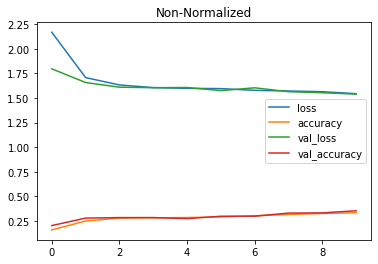

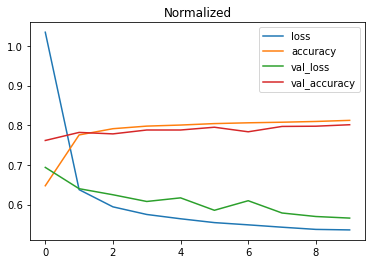

In [ ]:
# Loss Curve
pd.DataFrame(history_12.history).plot(title="Non-Normalized")
pd.DataFrame(history_13.history).plot(title="Normalized")

> The same model with slightly different data can produce *dramatically* different results. So, when you are comparing models, make sure you are comparing them on the same criteria (eg. same architecture but different datasets)

## iii).Ideal Learnig_Rate

In [ ]:
# we need callback to find the ideal learning rate
# Build the model

# set random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model 
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# set schduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

# fit the model
history_14 = model_14.fit(x_train_normal, y_train,
                          epochs=100, verbose=1,
                          validation_data=(x_test_normal, y_test),
                          callbacks=[lr_scheduler])                        

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8425 - accuracy: 0.3347 - val_loss: 1.4050 - val_accuracy: 0.4993
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1595 - accuracy: 0.5855 - val_loss: 0.9941 - val_accuracy: 0.6796
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8760 - accuracy: 0.7271 - val_loss: 0.8158 - val_accuracy: 0.7448
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7425 - accuracy: 0.7652 - val_loss: 0.7131 - val_accuracy: 0.7683
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6607 - accuracy: 0.7829 - val_loss: 0.6470 - val_accuracy: 0.7841
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6025 - accuracy: 0.7971 - val_loss: 0.6020 - val_accuracy: 0.7978
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5660 - accuracy: 0.8074 - val_loss: 0.5795 - val_ac

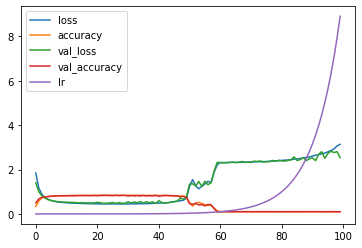

In [ ]:
# loss Curve
pd.DataFrame(history_14.history).plot()

In [ ]:
pd.DataFrame(history_14.history).head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.842481,0.334750,1.405038,0.4993,0.000100
1,1.159471,0.585467,0.994092,0.6796,0.000112
2,0.876008,0.727133,0.815831,0.7448,0.000126
3,0.742462,0.765150,0.713056,0.7683,0.000141
4,0.660716,0.782933,0.646962,0.7841,0.000158


### Loss vs. Learning_Rate graph

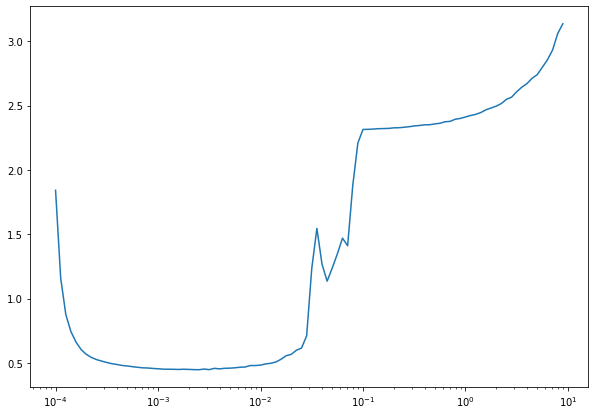

In [ ]:
# plotting Loss vs. Learnin_rate graph
plt.figure(figsize=(10,7))
plt.semilogx(history_14.history["lr"], history_14.history["loss"])

10^-3 seems to be our ideal learning rate

Building the model with 0.001 learnig_rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

# compile the model
model_15.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# fit the model
history_15 = model_15.fit(x_train_normal, y_train,
                          epochs=25, verbose=1,
                          validation_data=(x_test_normal, y_test))

# evaluate the model
model_15.evaluate(x_test_normal, y_test)                          

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5009 - accuracy: 0.8187 - val_loss: 0.4214 - val_accuracy: 0.8462
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3740 - accuracy: 0.8629 - val_loss: 0.4465 - val_accuracy: 0.8425
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3394 - accuracy: 0.8753 - val_loss: 0.3876 - val_accuracy: 0.8601
Epoch 4/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3185 - accuracy: 0.8832 - val_loss: 0.3748 - val_accuracy: 0.8666
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3003 - accuracy: 0.8884 - val_loss: 0.3626 - val_accuracy: 0.8679
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2865 - accuracy: 0.8928 - val_loss: 0.3629 - val_accuracy: 0.8657
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2769 - accuracy: 0.8972 - val_loss: 0.3828 - val_accuracy:

[0.3815748393535614, 0.8845999836921692]

Our model has reached the accuracy of **88.4%**

## iv).Evaluating our model

To evaluate our multi-class model we could:
* Evaluate its performance using classification matrix (eg. confusion matrix)
* Asses some of its predictions (through visualiztion)
* imporve its results (by training it for longer or changing the architecture)
* save and export it for use in applications

Lets try the first two's

In [ ]:
# find the predictions
y_probability = model_15.predict(x_test_normal)
pd.DataFrame(y_probability[0])

# The returned arrays are the probability of the possible label

,0
0,7.671814e-08
1,1.247403e-04
2,1.302080e-03
3,2.031846e-04
4,3.934898e-04
5,2.019921e-01
6,9.942637e-06
7,2.490789e-01
8,4.228824e-03
9,5.426667e-01


In [ ]:
# turnig the probability into number
tf.argmax(y_probability[0]), label_name[tf.argmax(y_probability[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

In [ ]:
# Convert all the prediction probabilities into integers
y_pred = tf.argmax(y_probability, axis=1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 6, 1, 5])>

### plot_confusion_matrix()

In [ ]:
from sklearn.metrics import confusion_matrix

# now plot the cofusion matrix
confusion_matrix(y_test, y_pred)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [ ]:
# plotting confusion matrix function
def plot_confusion_matrix_2(y_true, y_pred, classes, size, figsize=(5,5)):
  """
  plot_confusion_matrix_2(y_true, y_pred, classes, size, figsize=(5,5))
  plots confusion matrix.
  """
  import itertools
  import tensorflow as tf
  import matplotlib.pyplot as plt
  import numpy as np
  from sklearn.metrics import confusion_matrix
  

  # make confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  # normalize the confusion matrix
  cm_normal = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

  # labeling the classes
  labels = classes

  # making our graph pretty
  fg, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Greens)
  fg.colorbar(cax)

  # set description
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(cm.shape[0]),
         yticks=np.arange(cm.shape[0]),
         xticklabels=labels,
         yticklabels=labels)

  # set x_ticks and xticklabels to bottom
  ax.xaxis.tick_bottom()
  ax.xaxis.set_label_position("bottom")

  # set threshold value for different colors
  threshold = (cm.max() + cm.min()) / 2

  # print the values in cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_normal[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=11)

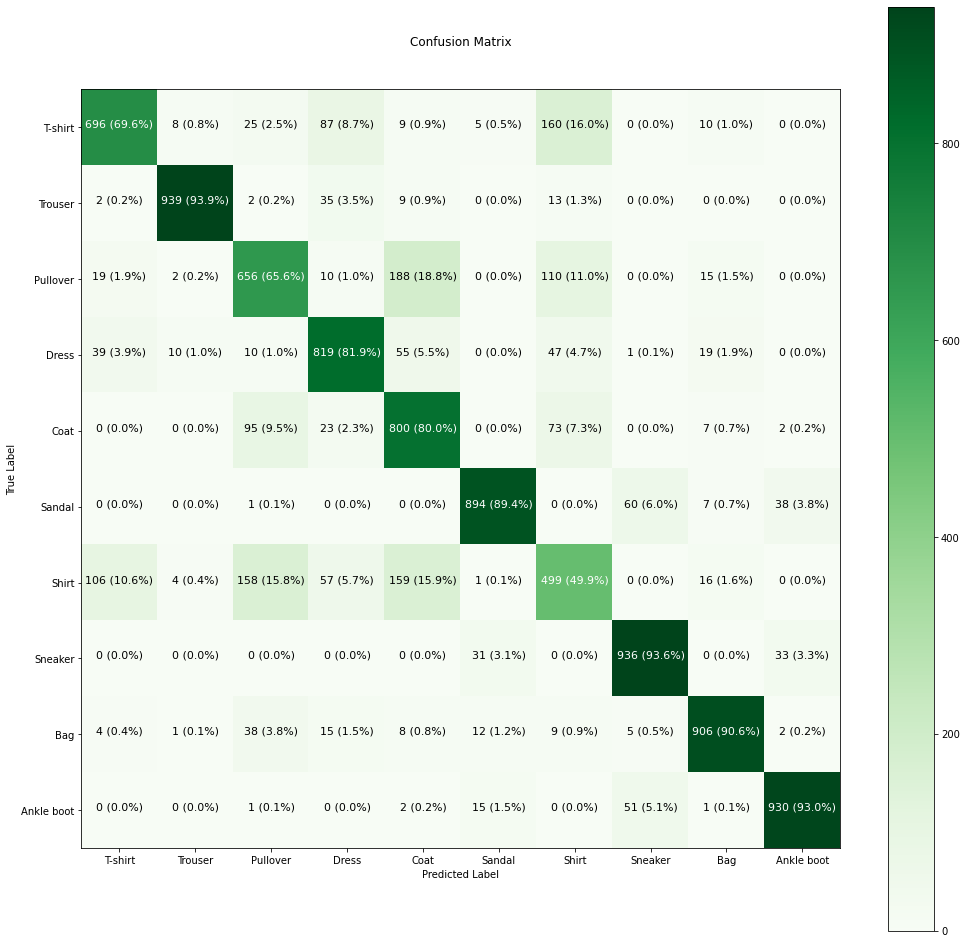

In [ ]:
plot_confusion_matrix_2(y_test, y_pred, label_name, size=18, figsize=(17,17))

### plot_random_images()
How about we create a fun little function:
* Plot a random image
* make prediction on random image
* label the plot with truth label and predicted label

In [ ]:
def plot_random_image(x_test_normal, y_test, model, label_name):
  import random
  """
  picks a random image, plots it and label it with a prediction and truth label
  """

  # set image size
  plt.figure(figsize=(10,7))
   
  for i in range(4):
    # random index
    index = random.choice(range(len(x_test_normal)))

    # show image
    plt.subplot(2,2,i+1)
    plt.imshow(x_test_normal[index], cmap=plt.cm.binary)

    # make prediction
    y_probability = model.predict(x_test_normal)
    y_pred = tf.argmax(y_probability, axis=1)

    # settin color red and green
    if y_pred[index] == y_test[index]:
      color = "green"
    else:
      color = "red"

    plt.xlabel("Predicted Label: {} <----> True Label: {}".format(label_name[y_pred[index]], 
                                                        label_name[y_test[index]]),
               color=color)
    

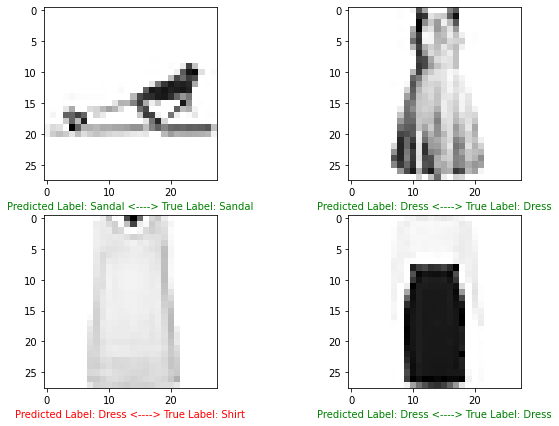

In [ ]:
plot_random_image(x_test_normal,y_test, model_15, label_name)

# 99.What Patterns is our model learning?

In [ ]:
# find the layers of our most recet model
model_15.layers

In [ ]:
# Extract a particular layer
model_15.layers[0]

## Weights and Biases
Key differece b/w Weights and biases is:
> Weights matrix has one value **per data point**

> Biases matrix has one value **per hidden unit**

In [ ]:
# get the pattern of our model
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights

784

Weights matrix has one value per data point (or per image)

In [ ]:
weights.shape

(784, 4)

In [ ]:
28 * 28

784

In [ ]:
model_15.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now lets check the biase vector

In [ ]:
biases

array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
      dtype=float32)

Biases matrix has only one value per hidden unit

In [ ]:
biases.shape

(4,)

Every neuron has a bias vector. Each of these are paired with Weighs matrix. Bias vector gets initialized as Zero (at least in Tensorflow Dense layer).

 The bias vector dictates how much patterns within the corresponding weight matrix should influence the next layer.

    tf.keras.layers.Dense
    (                                  
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros'
    )

## plot_model() 

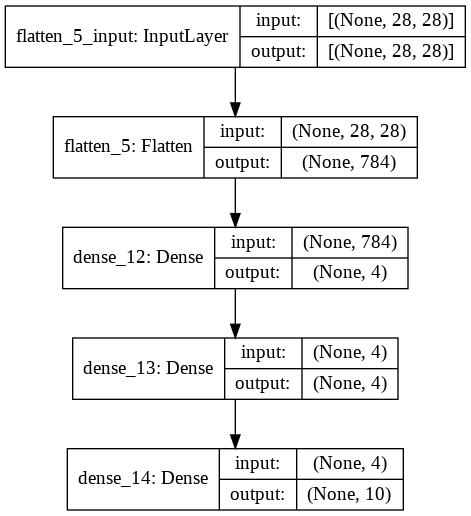

In [ ]:
# Another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model

plot_model(model_15, show_shapes=True)

# Exercise


## Q-2

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import data
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=1000, noise=0.04, random_state=42)
pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "y":y}).head(3)

,x0,x1,y
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1


In [ ]:
len(x), len(y)

(1000, 1000)

Normalize the data (Preprocessing)

In [ ]:
x.min(), x.max()

(-1.0910155148863676, 1.0510882209029127)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
s.fit(x)
x_normal = s.transform(x)

In [ ]:
x_normal

array([[0.86064537, 0.62093107],
       [0.16065471, 0.58446785],
       [0.12431286, 0.60157499],
       ...,
       [0.44777653, 0.1274182 ],
       [0.82192989, 0.14503017],
       [0.64104161, 0.96008772]])

Build the model

In [ ]:
# set randomm seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# fit the model
model.fit(x_normal, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.evaluate(x_normal, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9470


[0.194045752286911, 0.9470000267028809]

## Q-3

In [ ]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=0.03, random_state=42)

len(x), len(y)

(1000, 1000)

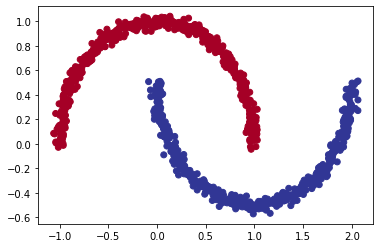

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

Normalize the data

In [ ]:
s = MinMaxScaler()
s.fit(x)
x_normal = s.transform(x)

In [ ]:
# split the data in train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normal, y, test_size=0.2, random_state=42)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model.fit(x_train, y_train, epochs=100, verbose=0)

# evaluate the model
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8900


[0.24232082068920135, 0.8899999856948853]

## Q-5

In [ ]:
input = tf.keras.activations.relu(x)
output = tf.keras.activations.softmax(input)
output

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[0.40348115, 0.59651885],
       [0.72203409, 0.27796591],
       [0.71474159, 0.28525841],
       ...,
       [0.83941945, 0.16058055],
       [0.41251402, 0.58748598],
       [0.54800151, 0.45199849]])>

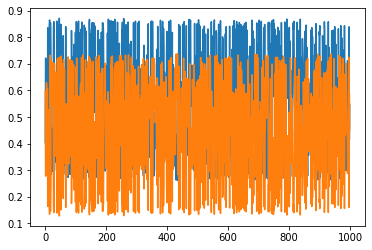

In [ ]:
plt.plot(output)

In [ ]:
# softmax function
tf.random.set_seed(42)

x1 = x

a = tf.exp(x1)
a = tf.reduce_sum(a)


for i in range(len(x1)):
  x1[i] = tf.exp(x1[i]) / a

x1

0.9999999999999998

## Q-7

In [ ]:
# import random

# for i in range(100):
#   index = random.choice(range(len(x_test)))
#   if y_train[index] == 0:
#    plt.subplot(2, 2, 1)
#    plt.imshow(x_test[index], cmap=plt.cm.binary)
#    if y_pred[index] == y_test[index]:
#      color = "green"
#    else:
#      color = "red"
#    plt.xlabel("predicted value:{} <--> True value:{}" .format(label_name[y_pred[index]],
#                                                                label_name[y_test[index]]),
#               color = color)